### 目的
- 为了使用 GPytorch 来替代 sklearn.gaussian_process

In [1]:
import torch
import gpytorch
import numpy as np
from gaussian_process import GaussianProcessWrapper
from sklearn.gaussian_process import GaussianProcessRegressor
from gym_pybullet_drones.utils.utils import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

pybullet build time: Nov 28 2023 23:45:17


In [2]:
observed_point = [[0,0.1,0.0],[0,0.2,0.1],[0,0.3,0.2],[0,0.4,0.3]]
def show_heatmap(data):
    plt.imshow(data.reshape((10,10)),cmap='viridis',aspect='equal',vmin=0,vmax=1)

In [3]:
gp_sklearn = GaussianProcessWrapper(6,[1,2,3,4,5],None,0,use_gpytorch=False)
for point in observed_point:
    for gp in gp_sklearn.GPs:
        gp.add_observed_point(np.array(point).reshape((-1,3)),np.array(1.0))

In [4]:
gp_sklearn.update_GPs()
all_pred,all_std,_ = gp_sklearn.update_grids(0.1)

In [5]:
print(np.max(all_pred))
print(np.min(all_std))
gp_sklearn.GPs: list[GaussianProcessRegressor]
print(gp_sklearn.GPs[0].kernel)

0.5204122156852025
0.898902827891267
Matern(length_scale=[0.1, 0.1, 3], nu=1.5)


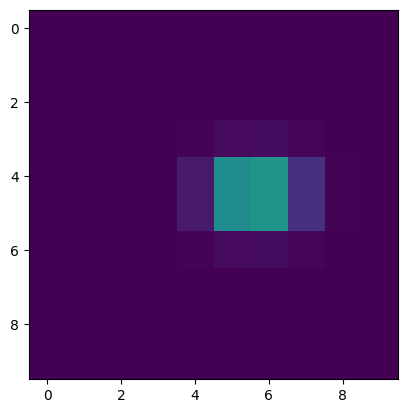

In [6]:
show_heatmap(all_pred)
# show_heatmap(all_std)

### 
这里使用一个 gpytoch 版本实现的 gp

In [7]:
gp_torch = GaussianProcessWrapper(6,[1,2,3,4,5],None,0,use_gpytorch=True)
for point in observed_point:
    for gp in gp_torch.GPs:
        gp.add_observed_point(np.array(point).reshape((-1,3)),np.array(1.0))

In [8]:
gp_torch.update_GPs()
all_pred_torch,all_std_torch,_ = gp_torch.update_grids(0.1)

In [9]:
print(np.max(all_pred_torch))
print(np.max(all_std_torch))
print(gp_torch.GPs[0].gp_torch.covar_module.raw_lengthscale)

0.38393392487754385
1.3012483233643504
Parameter containing:
tensor([0.1000, 0.1000, 3.0000], device='cuda:0')


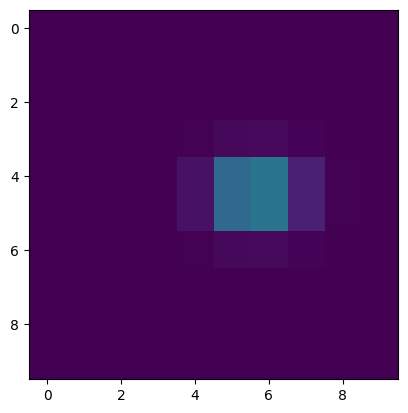

In [10]:
show_heatmap(all_pred_torch)
# show_heatmap(all_std_torch)

检查核矩阵

In [11]:
gp_sklearn.GPs[0].kernel(observed_point)

array([[1.        , 0.483063  , 0.13952288, 0.0342303 ],
       [0.483063  , 1.        , 0.483063  , 0.13952288],
       [0.13952288, 0.483063  , 1.        , 0.483063  ],
       [0.0342303 , 0.13952288, 0.483063  , 1.        ]])

In [12]:
gp_torch.GPs[0].gp_torch.covar_module(torch.from_numpy(np.asarray(observed_point)).cuda()).detach().cpu().numpy()

array([[1.        , 0.48306301, 0.13952288, 0.0342303 ],
       [0.48306301, 1.        , 0.48306301, 0.13952288],
       [0.13952288, 0.48306301, 1.        , 0.48306301],
       [0.0342303 , 0.13952288, 0.48306301, 1.        ]])

In [13]:
test_x = add_t(gp_sklearn.GPs[0].grid,1)

In [14]:
with torch.no_grad():
    a = gp_torch.GPs[0].gp_torch(torch.from_numpy(test_x).cuda()).mean

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
a.max()

NameError: name 'a' is not defined

In [ ]:
import pickle

with open("sklearn.pickle", "rb") as file:
    sk = pickle.load(file)
with open("gpytorch.pickle", "rb") as file:
    gp = pickle.load(file)

In [ ]:
data = np.asarray([0,0.4,0.4]).reshape(1,-1)

In [ ]:
sk.predict(data)

array([0.99833732])

In [ ]:
gp.X_train_

AttributeError: 'GaussianProcessRegressorTorch' object has no attribute 'X_train_'

In [ ]:
gp.predict(torch.from_numpy(data).cuda()).mean

tensor([0.6794], device='cuda:0', dtype=torch.float64)